<AxesSubplot: title={'center': 'Seinfeld Episodes Watched by Day'}>

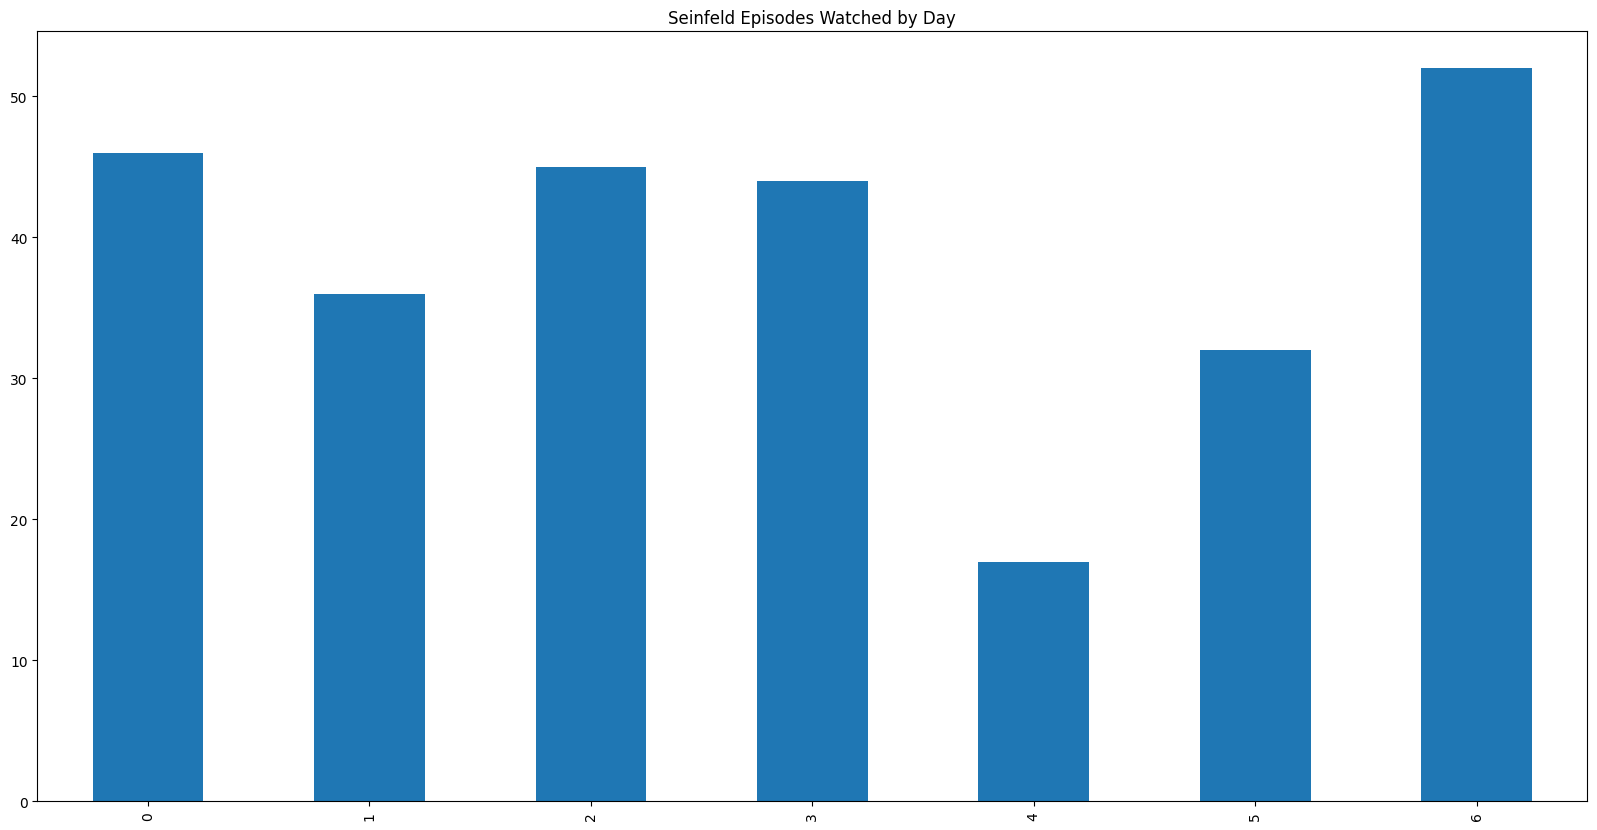

In [1]:
import pandas as pd
import matplotlib

df = pd.read_csv('ViewingActivity.csv')
df.shape
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

# Make the Start Time column into the dataframe's index because tz_convert can only be used on a DatetimeIndex
df = df.set_index('Start Time')

# Convert from UTC timezone to CET 
df.index = df.index.tz_convert('CET')

# Reset the index so that Start Time becomes a column again
df = df.reset_index()

# Converting duration to a measurement of time duration that pandas understand
df['Duration'] = pd.to_timedelta(df['Duration'])

# Calculates watchtime given a title and profile name
def show(Title, ProfileName): 
    showdf = df[df['Title'].str.contains(Title, regex = False)]
    showdf = showdf[showdf['Profile Name'].str.contains(ProfileName, regex = False)]
    return showdf

def watchtime(Title, ProfileName):
    showdf = show(Title, ProfileName)
    watchtimedf = showdf[(showdf['Duration'] > '0 days 00:01:00')]
    return watchtimedf['Duration'].sum()

def weekdayplot(Title, ProfileName):
    showdf = show(Title, ProfileName)
    showdf['Weekday'] = showdf['Start Time'].dt.weekday
    showdf['Weekday'] = pd.Categorical(showdf['Weekday'], categories=[0,1,2,3,4,5,6], ordered=True)
    # Count the rows for each weekday
    show_by_day = showdf['Weekday'].value_counts()
    # Sort the weekdays in right order
    show_by_day = show_by_day.sort_index()
    # PLOT!
    finalplot = show_by_day.plot(kind='bar', figsize=(20,10), title=f'{Title} Episodes Watched by Day')

    return finalplot

def hourplot(Title, ProfileName):
    showdf = show(Title, ProfileName)
    showdf['Hour'] = showdf['Start Time'].dt.hour
    showdf['Hour'] = pd.Categorical(showdf['Hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)
    # Count the rows for each hour
    show_by_hour = showdf['Hour'].value_counts()
    # Sort the weekdays in right order
    show_by_hour = show_by_hour.sort_index()
    # PLOT!
    finalplot = show_by_hour.plot(kind='bar', figsize=(20,10), title=f'{Title} Episodes Watched by Hour')

    return finalplot


hourplot('Seinfeld', 'Sofija och Oliver')

# TODO Sort out unique shows to calculate total time / most watched shows
